In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/276/proj

Mounted at /content/drive
/content/drive/My Drive/276/proj


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Cleaning/Managing/Merging Datasets

In [ ]:
# import pandas as pd

# Read the rows of the first CSV file
df1 = pd.read_csv('pdb_data_no_dups.csv')

# Save these rows into a new CSV file
df1.to_csv('sample1.csv', index=False)

# Read the rows of the second CSV file
df2 = pd.read_csv('pdb_data_seq.csv')

# Save these rows into a new CSV file
df2.to_csv('sample2.csv', index=False)

df_seq = pd.read_csv('sample1.csv')
df_char = pd.read_csv('sample2.csv')

In [ ]:
# merging the common values sequence and the meta data based on ID

protein_char = df_char[df_char.macromoleculeType == 'Protein']
protein_seq = df_seq[df_seq.macromoleculeType == 'Protein']

df = protein_char.merge(protein_seq, how='inner', on='structureId')

# drop any null values
df = df.dropna()

# do not want duplicate sequence values in the datasets
df = df.drop_duplicates(["sequence"])
df = df.drop_duplicates(["structureId"])

# preveting non-str values (in classfication and sequence) to be in the dataset
df = df[[type(c) == type('') for c in df.classification.values]]
df = df[[type(c) == type('') for c in df.sequence.values]]

# only interested in protien sequences
df = df[df.macromoleculeType_x == 'Protein']

# the index values were even, so fixing that
df.reset_index()

# since we are looking at sequenctial data looking at small sequnces wont make a good model
# many papers only look at values over 300
df = df.loc[df.residueCount_x>300]
df = df.drop(columns=['macromoleculeType_x', 'publicationYear'])

In [ ]:
df.structureId.value_counts()

1A04    1
4IAQ    1
4IBZ    1
4IBY    1
4IBX    1
       ..
3AVR    1
3AVO    1
3AV8    1
3AV4    1
6FAH    1
Name: structureId, Length: 26096, dtype: int64

In [ ]:
df[df.structureId == '4WZ7']

,structureId,chainId,sequence,residueCount_x,classification,experimentalTechnique,macromoleculeType_y,residueCount_y,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue
263575,4WZ7,1,MIINIVEILIFLVCVLFSVAYLTVAERKTLAYMQRRLGPNFVGYYG...,6939,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,6939,3.6,656099.62,"VAPOR DIFFUSION, HANGING DROP",291.0,6.09,79.79,"PEG 3350, calcium acetate, glycerol",7.3


this code if trying to get just top 10 classes

In [ ]:
df.head(500)

,structureId,chainId,sequence,residueCount_x,classification,experimentalTechnique,macromoleculeType_y,residueCount_y,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue
177,1A04,A,SNQEPATILLIDDHPMLRTGVKQLISMAPDITVVGEASNGEQGIEL...,430,SIGNAL TRANSDUCTION PROTEIN,X-RAY DIFFRACTION,Protein,430,2.20,47657.25,"VAPOR DIFFUSION, SITTING DROP",277.0,2.49,51.03,THE PROTEIN SOLUTION CONTAINING 23.3 MG/ML OF ...,7.60
238,1A0R,B,XSELDQLRQEAEQLKNQIRDARKACADATLSQITNNIDPVGRIQMR...,650,COMPLEX (TRANSDUCER/TRANSDUCTION),X-RAY DIFFRACTION,Protein,650,2.80,73467.70,MICROBATCH,277.0,2.25,45.00,THE PROTEIN COMPLEX (10 MG/ML SOLUTION) WAS CR...,6.80
529,1A52,A,MIKRSKKNSLALSLTADQMVSALLDAEPPILYSEYDPTRPFSEASM...,516,RECEPTOR,X-RAY DIFFRACTION,Protein,516,2.80,60742.18,"VAPOR DIFFUSION, HANGING DROP",291.0,2.97,58.65,WELL: 100 MM TRIS PH 7.6 480 MM MGCL2 10 MM MG...,7.60
649,1A72,A,STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...,374,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,374,2.60,40658.50,"VAPOR DIFFUSION, HANGING DROP",277.0,2.30,46.82,CRYSTALS GROWN FROM 4 MICROLITER HANGING DROPS...,8.40
735,1A8E,A,DKTVRWCAVSEHEATKCQSFRDHMKSVIPSDGPSVACVKKASYLDC...,329,IRON TRANSPORT,X-RAY DIFFRACTION,Protein,329,1.60,36524.27,"VAPOR DIFFUSION, HANGING DROP",277.0,2.40,50.00,PROTEIN WAS CRYSTALLIZED FROM 26% PEG 4000. BU...,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10357,1EWR,A,TPGTLLQESLLPREANYLAAIATGDGWGLAFLDVSTGEFKGTVLKS...,1298,HYDROLASE,X-RAY DIFFRACTION,Protein,1298,3.19,146097.28,"VAPOR DIFFUSION, HANGING DROP",293.0,3.95,68.83,"PEG 400, ammonium sulfate, copper chloride, HE...",7.20
10366,1EWY,A,TQAKAKHADVPVNLYRPNAPFIGKVISNEPLVKEGGIGIVQHIKFD...,704,OXIDOREDUCTASE,X-RAY DIFFRACTION,Protein,704,2.38,80537.87,"VAPOR DIFFUSION, HANGING DROP",277.0,1.73,28.90,"20-24% PEG 6000,10 mM MES pH 5.5, VAPOR DIFFUS...",5.50
10369,1EWZ,A,SITENTSWNKEFSAEAVNGVFVLCKSSSKSCATNDLARASKEYLPA...,984,HYDROLASE,X-RAY DIFFRACTION,Protein,984,2.40,110097.16,EVAPORATION,277.0,2.51,51.00,"ammonium sulfate, Tris, pH 8.5, EVAPORATION, t...",8.50
10376,1EX2,A,MTKPLILASQSPRRKELLDLLQLPYSIIVSEVEEKLNRNFSPEENV...,378,STRUCTURAL GENOMICS,X-RAY DIFFRACTION,Protein,378,1.85,43273.98,"VAPOR DIFFUSION, HANGING DROP",295.0,2.97,58.54,"8% PEG 8000, 0.1M Tris-HCl, pH 8.5, VAPOR DIFF...",8.50


In [ ]:
# counting the occurences of each label
counts = df['classification'].value_counts(ascending = False)
# we want to limit the number of labels to just 10 top for easier predictions
top_classes = counts.head(10).index
# this will also help us reduce the size of our dataset
df = df[df['classification'].isin(top_classes)]

In [ ]:
# visualize the code
class_list = [c for c in top_classes]
counts_list = [c for c in counts.sort_values(ascending = False).head(10)]
sequences = df.sequence.values
sequence_lengths = [len(s) for s in sequences]

In [ ]:
counts_list

[4071, 3518, 2861, 1694, 1053, 713, 600, 558, 554, 522]

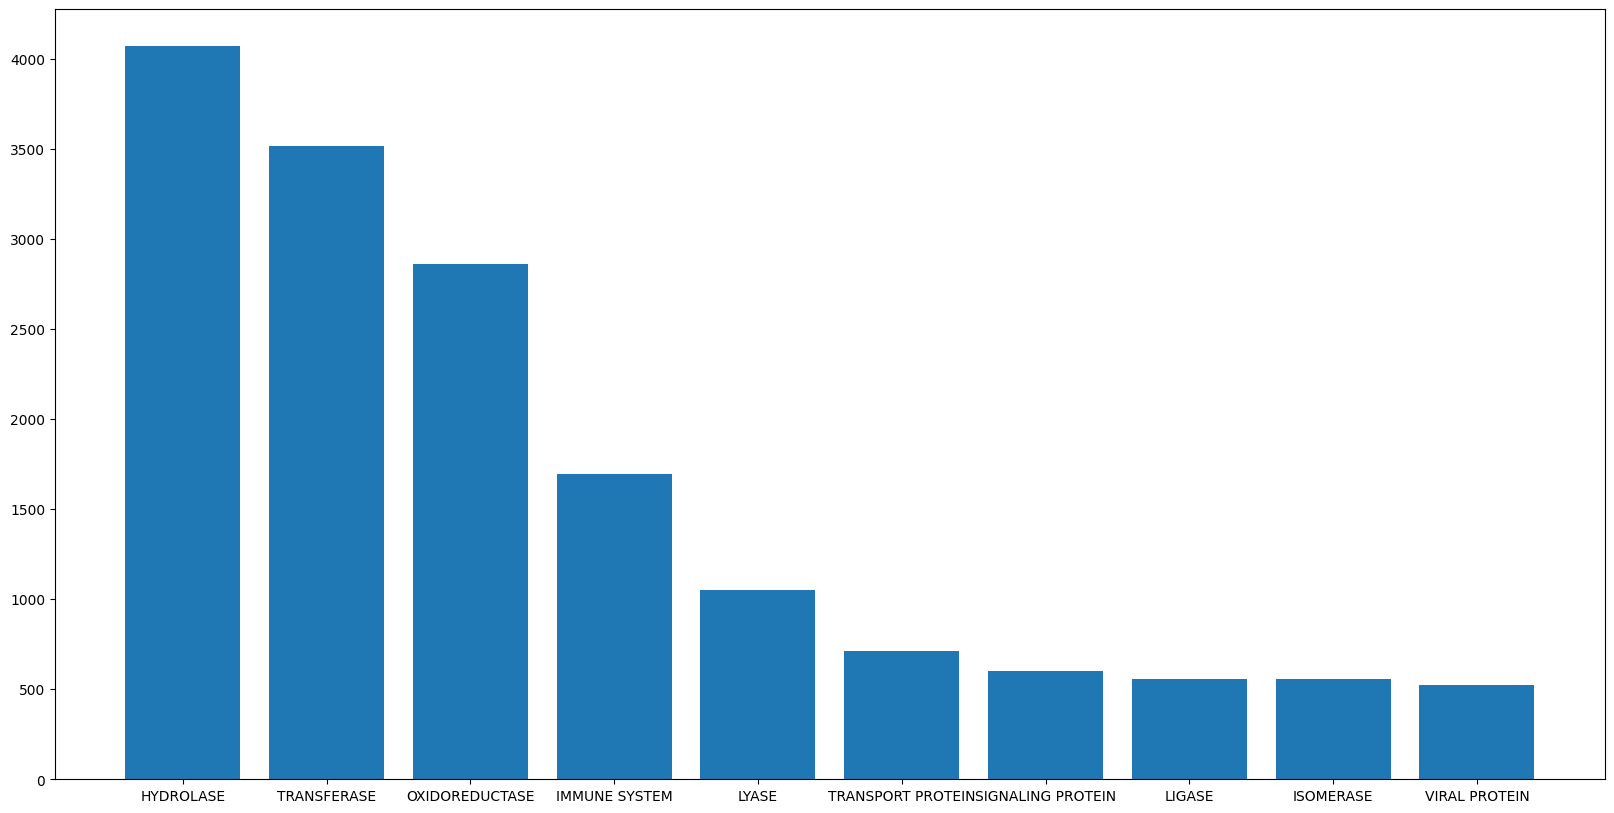

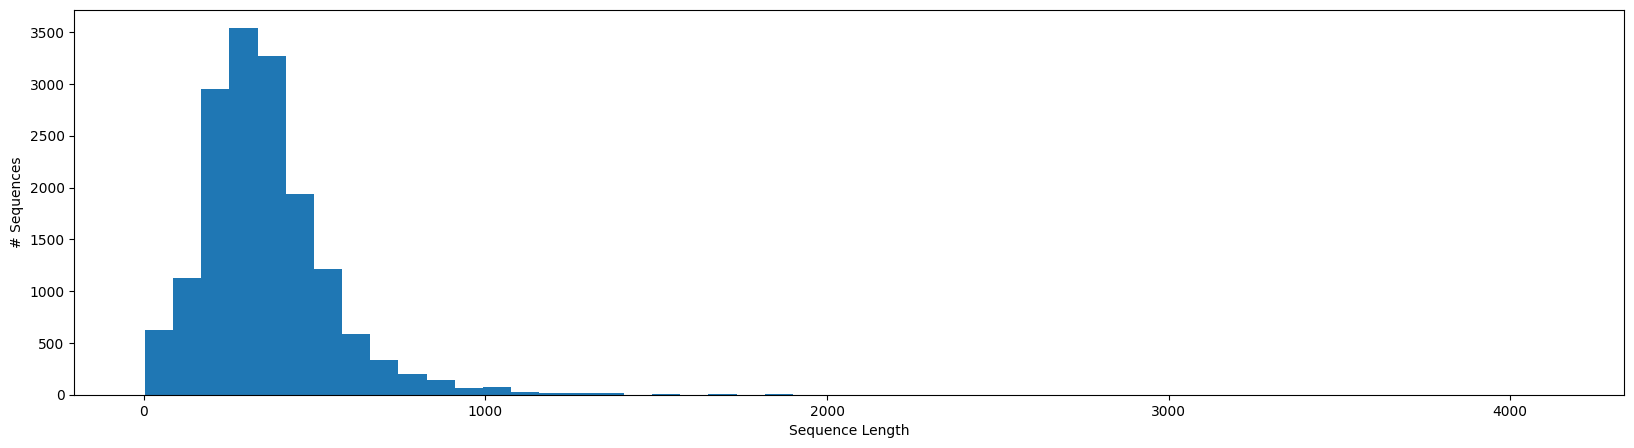

In [ ]:
plt.figure(figsize=(20, 10))
# create a plot to show class and instance list
plt.bar(class_list, counts_list)
plt.show()

plt.figure(figsize=(20, 5))
# showing the sequence length distribution
plt.hist(sequence_lengths, bins=50)
plt.xlabel('Sequence Length')
plt.ylabel('# Sequences')
plt.show()

data is skewed so balancing the data so that each class has only 600 data points

In [ ]:
balanced_df = pd.DataFrame()

for class_name in top_classes:
  # Filter the DataFrame for the current class
  class_df = df[df['classification'] == class_name]

  # Sample 500 data points from this class
  # If the class has less than 600 data points, take all of them
  # This ensures that no class will have more than 600 data points

  # CHANGE IT TO 500

  sampled_df = class_df.sample(n=min(500, len(class_df)), random_state=42)

  # Append the sampled data points to the balanced DataFrame
  balanced_df = pd.concat([balanced_df, sampled_df])

# Reset index of the new balanced DataFrame
balanced_df.reset_index(drop=True, inplace=True)

# Now balanced_df has an equal number of data points (up to 600) for each class
df = balanced_df

In [ ]:
label_df = df[['classification', 'structureId']]
label_df.to_csv('label.csv', index=False)

In [ ]:
# do not run
df.to_csv('Biodata.csv', index=False)

In [ ]:
# One Hot encdoing label values
df = pd.read_csv("Biodata.csv")
Y = pd.get_dummies(df['classification']).values

Lets try looking at all the meta data and see if it helps us classify the data into the correct family classes.

In [ ]:
X = df.drop(columns = ['classification', 'structureId'], axis=1)  # Drop the target column
y = df['classification']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Function to create trigrams
def split_into_trigrams(sequence):
    return ' '.join([sequence[i:i+3] for i in range(0, len(sequence), 3)])

# Applying the function to sequence columns
X_train_sequence = X_train['sequence'].apply(split_into_trigrams)
X_test_sequence = X_test['sequence'].apply(split_into_trigrams)

# Vectorizing the sequence data
vect = CountVectorizer(analyzer='word')
X_train_seq_vect = vect.fit_transform(X_train_sequence)
X_test_seq_vect = vect.transform(X_test_sequence)

# Vectorizing description data (natural language text)
vect_desc = TfidfVectorizer()  # You can customize this with parameters as needed
X_train_desc_vect = vect_desc.fit_transform(X_train['pdbxDetails'])
X_test_desc_vect = vect_desc.transform(X_test['pdbxDetails'])

# Preprocess other columns (numerical, categorical) as needed
# For example, for a numerical column:
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[['residueCount_x', 'residueCount_y', 'resolution', 'structureMolecularWeight', 'crystallizationTempK', 'densityMatthews', 'densityPercentSol', 'phValue']])
X_test_num_scaled = scaler.transform(X_test[['residueCount_x', 'residueCount_y', 'resolution', 'structureMolecularWeight', 'crystallizationTempK', 'densityMatthews', 'densityPercentSol', 'phValue']])

# For a categorical column:
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_cat_encoded = encoder.fit_transform(X_train[['chainId', 'crystallizationMethod', 'experimentalTechnique']])
X_test_cat_encoded = encoder.transform(X_test[['chainId', 'crystallizationMethod', 'experimentalTechnique']])

# Combine all preprocessed columns
from scipy.sparse import hstack
X_train_final = hstack([X_train_seq_vect, X_train_num_scaled, X_train_cat_encoded])
X_test_final = hstack([X_test_seq_vect, X_test_num_scaled, X_test_cat_encoded])


In [ ]:
# Initialize models
log_reg = LogisticRegression(max_iter=50)
random_forest = RandomForestClassifier(n_estimators=100)
gradient_boosting = GradientBoostingClassifier(n_estimators=100)

# Train and evaluate Logistic Regression
log_reg.fit(X_train_final, y_train)
y_pred_lr = log_reg.predict(X_test_final)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Train and evaluate Random Forest
random_forest.fit(X_train_final, y_train)
y_pred_rf = random_forest.predict(X_test_final)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Train and evaluate Gradient Boosting
gradient_boosting.fit(X_train_final, y_train)
y_pred_gb = gradient_boosting.predict(X_test_final)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.505
                   precision    recall  f1-score   support

        HYDROLASE       0.34      0.33      0.33       100
    IMMUNE SYSTEM       0.77      0.73      0.75       118
        ISOMERASE       0.53      0.54      0.53       102
           LIGASE       0.52      0.39      0.45       114
            LYASE       0.45      0.47      0.46        91
   OXIDOREDUCTASE       0.54      0.45      0.49       100
SIGNALING PROTEIN       0.39      0.46      0.42        84
      TRANSFERASE       0.40      0.42      0.41        97
TRANSPORT PROTEIN       0.51      0.55      0.53       103
    VIRAL PROTEIN       0.57      0.67      0.62        91

         accuracy                           0.51      1000
        macro avg       0.50      0.50      0.50      1000
     weighted avg       0.51      0.51      0.50      1000

Random Forest Accuracy: 0.457
                   precision    recall  f1-score   support

        HYDROLASE       0.29      0.25      0

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
  plt.title(title)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

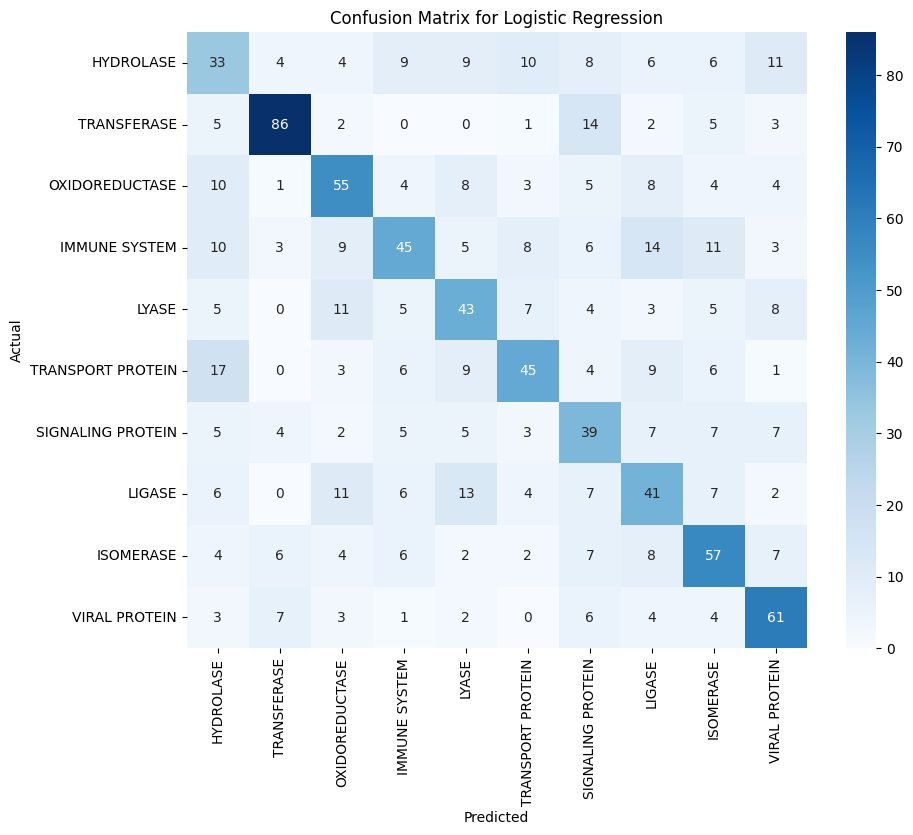

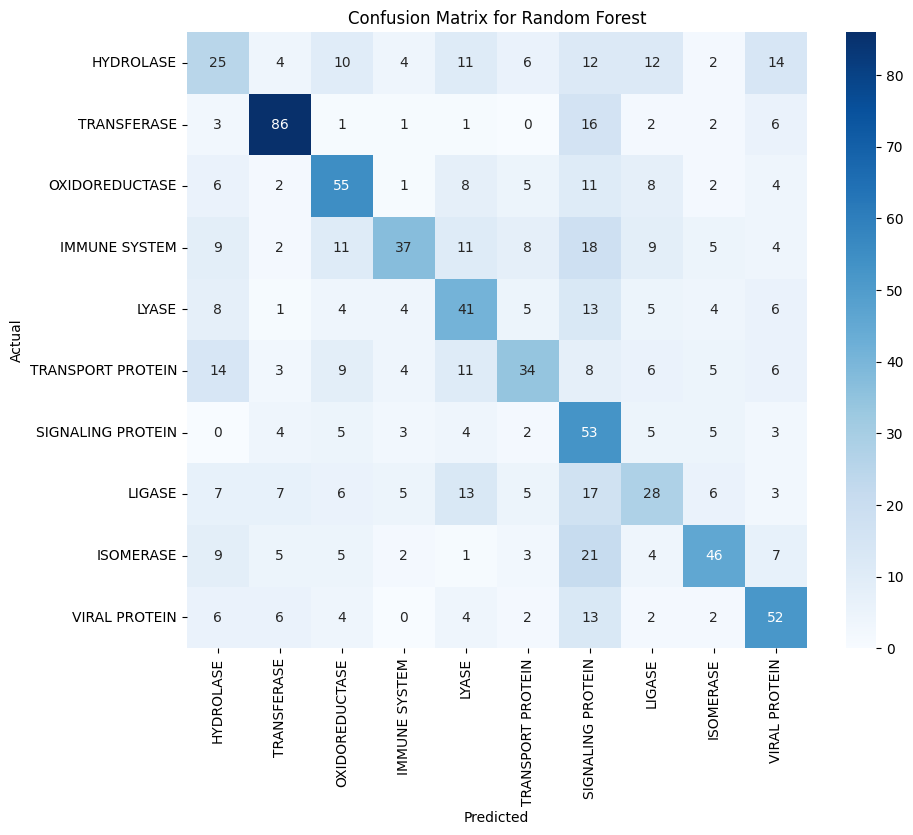

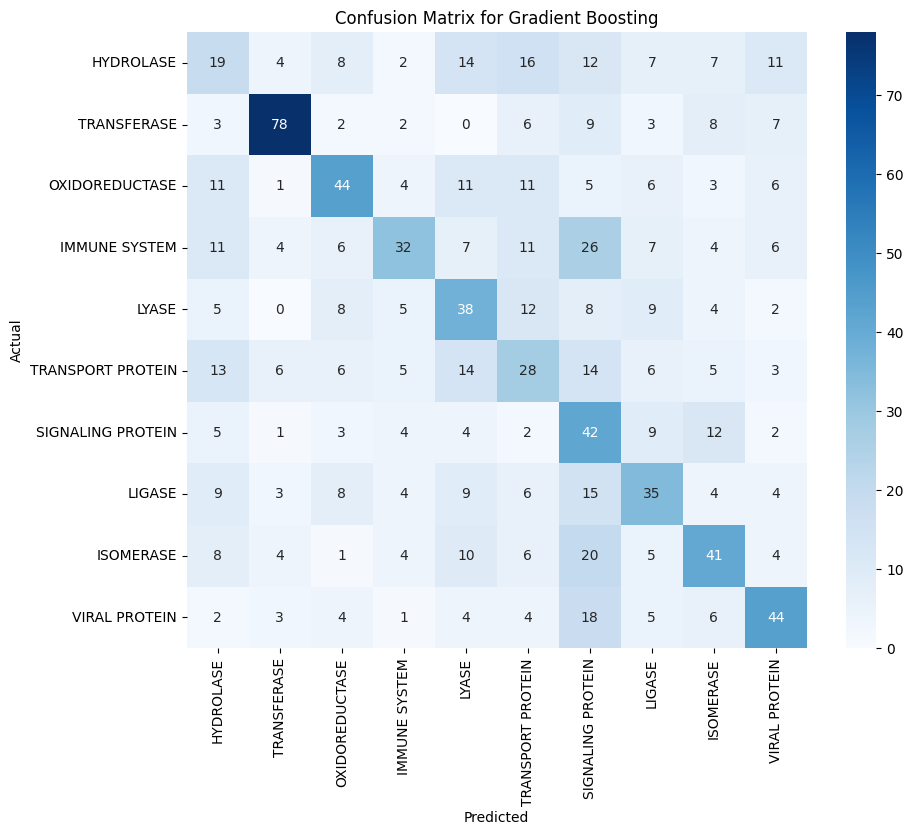

In [ ]:
# For Logistic Regression
plot_confusion_matrix(y_test, y_pred_lr, class_list, "Confusion Matrix for Logistic Regression all metadata")

# For Random Forest
plot_confusion_matrix(y_test, y_pred_rf, class_list, "Confusion Matrix for Random Forest all metasata")

# For Gradient Boosting
plot_confusion_matrix(y_test, y_pred_gb, class_list, "Confusion Matrix for Gradient Boosting all metasata")


In [ ]:
# Machine Learning NLP approach on sequence of protien
# BLAST engine has the capability to do this but looking at NLP is interesting
# We generate trigrams of AA from the protein sequence

X_train, X_test,y_train,y_test = train_test_split(df['sequence'], df['classification'], test_size = 0.2, random_state = 1)

# Changing training and testing data
X_train_trigrams = X_train.apply(split_into_trigrams)
X_test_trigrams = X_test.apply(split_into_trigrams)

# Create a Count Vectorizer to gather the unique elements in sequence
# analyzer will be word as we are looking at chunks of 3 now
vect = CountVectorizer(analyzer = 'word')

# Fit and Transform CountVectorizer
vect.fit(X_train_trigrams)
X_train_df = vect.transform(X_train_trigrams)
X_test_df = vect.transform(X_test_trigrams)

#Print a few of the features
print(vect.get_feature_names_out()[-20:])

['yya' 'yyc' 'yyd' 'yye' 'yyf' 'yyg' 'yyh' 'yyi' 'yyk' 'yyl' 'yym' 'yyn'
 'yyp' 'yyq' 'yyr' 'yys' 'yyt' 'yyv' 'yyw' 'yyy']


In [ ]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100)
gradient_boosting = GradientBoostingClassifier(n_estimators=100)

# Train and evaluate Logistic Regression
log_reg.fit(X_train_df, y_train)
y_pred_lr = log_reg.predict(X_test_df)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Train and evaluate Random Forest
random_forest.fit(X_train_df, y_train)
y_pred_rf = random_forest.predict(X_test_df)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Train and evaluate Gradient Boosting
gradient_boosting.fit(X_train_df, y_train)
y_pred_gb = gradient_boosting.predict(X_test_df)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Logistic Regression Accuracy: 0.488
                   precision    recall  f1-score   support

        HYDROLASE       0.38      0.36      0.37       100
    IMMUNE SYSTEM       0.66      0.78      0.72       118
        ISOMERASE       0.58      0.53      0.55       102
           LIGASE       0.50      0.39      0.44       114
            LYASE       0.41      0.44      0.43        91
   OXIDOREDUCTASE       0.47      0.41      0.44       100
SIGNALING PROTEIN       0.37      0.40      0.39        84
      TRANSFERASE       0.36      0.40      0.38        97
TRANSPORT PROTEIN       0.48      0.47      0.48       103
    VIRAL PROTEIN       0.58      0.65      0.61        91

         accuracy                           0.49      1000
        macro avg       0.48      0.48      0.48      1000
     weighted avg       0.49      0.49      0.49      1000

Random Forest Accuracy: 0.454
                   precision    recall  f1-score   support

        HYDROLASE       0.29      0.31      0

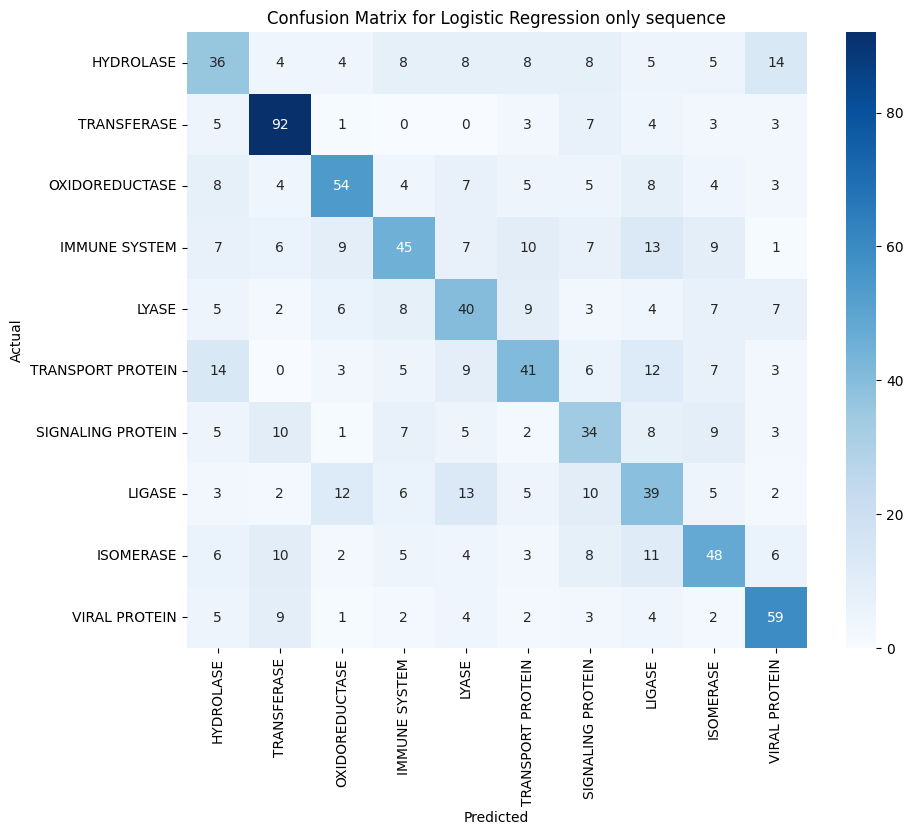

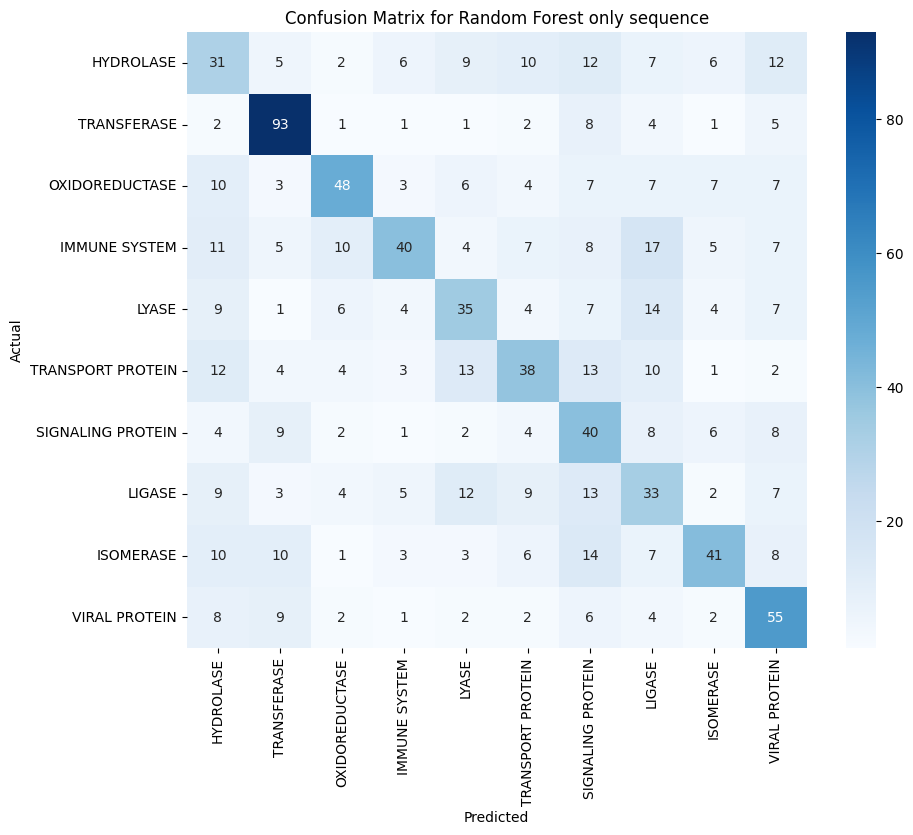

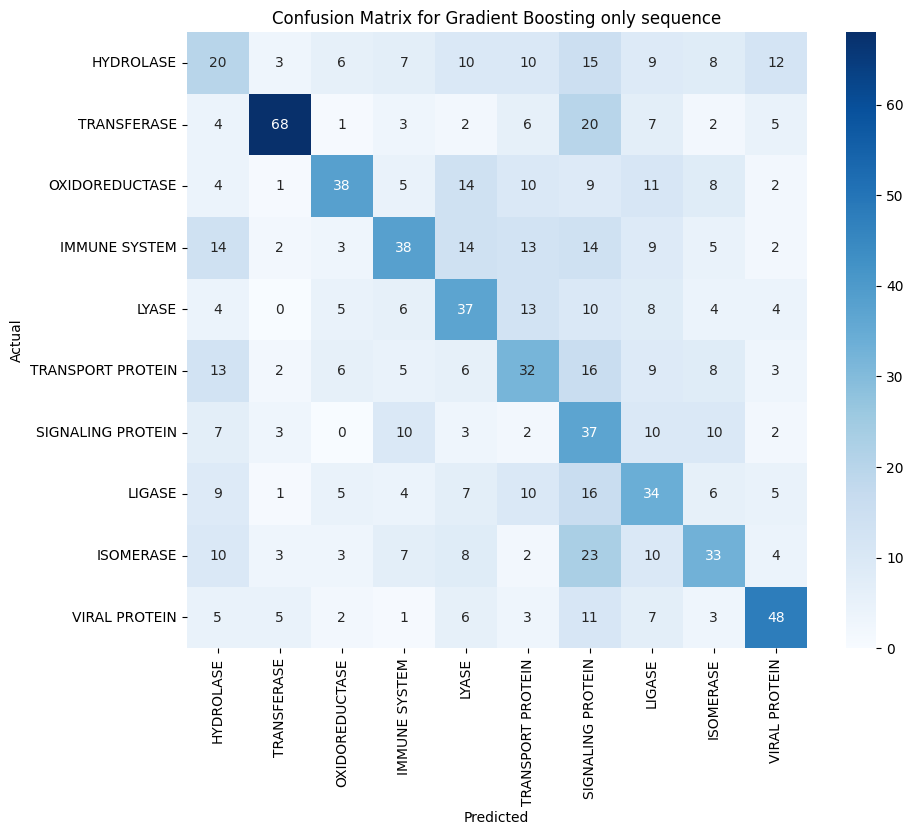

In [ ]:
# For Logistic Regression
plot_confusion_matrix(y_test, y_pred_lr, class_list, "Confusion Matrix for Logistic Regression only sequence")

# For Random Forest
plot_confusion_matrix(y_test, y_pred_rf, class_list, "Confusion Matrix for Random Forest only sequence")

# For Gradient Boosting
plot_confusion_matrix(y_test, y_pred_gb, class_list, "Confusion Matrix for Gradient Boosting only sequence")


In [ ]:
# use basic model to check how well CountVectorizer work
# Make a prediction dictionary to store accuracys of all the models
prediction = dict()

# Bayes Model
nb_model = MultinomialNB()

# Training the model using training data
nb_model.fit(X_train_df, y_train)
NB_pred = nb_model.predict(X_test_df)
prediction["MultinomialNB using CountVectorizer"] = accuracy_score(NB_pred, y_test)
print("MultinomialNB using CountVectorizer: "+str(prediction['MultinomialNB using CountVectorizer']))
print("Classification Report NB:", classification_report(y_test, NB_pred))

# Initialize the SVM model
svm_model = SVC(kernel='rbf')

# Train the model using training data
svm_model.fit(X_train_df, y_train)
svm_pred = svm_model.predict(X_test_df)
prediction["SVM classifier using CountVectorizer"] = accuracy_score(svm_pred, y_test)

# Evaluate the model
print("SVM classifier using CountVectorizer: "+str(prediction['SVM classifier using CountVectorizer']))
print("Classification Report SVM:", classification_report(y_test, svm_pred))

MultinomialNB using CountVectorizer: 0.48
Classification Report NB:                    precision    recall  f1-score   support

        HYDROLASE       0.33      0.41      0.37       100
    IMMUNE SYSTEM       0.91      0.60      0.72       118
        ISOMERASE       0.57      0.45      0.51       102
           LIGASE       0.46      0.54      0.50       114
            LYASE       0.38      0.41      0.39        91
   OXIDOREDUCTASE       0.39      0.46      0.42       100
SIGNALING PROTEIN       0.52      0.36      0.42        84
      TRANSFERASE       0.32      0.51      0.39        97
TRANSPORT PROTEIN       0.57      0.46      0.51       103
    VIRAL PROTEIN       0.71      0.56      0.63        91

         accuracy                           0.48      1000
        macro avg       0.52      0.48      0.49      1000
     weighted avg       0.52      0.48      0.49      1000

SVM classifier using CountVectorizer: 0.473
Classification Report SVM:                    precision    

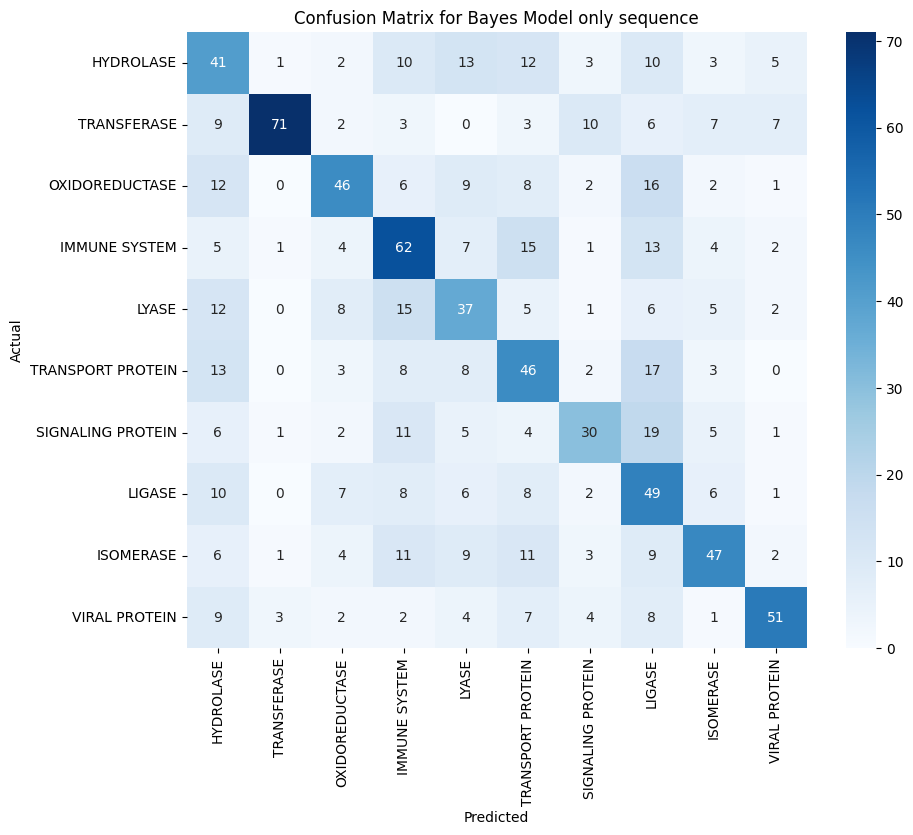

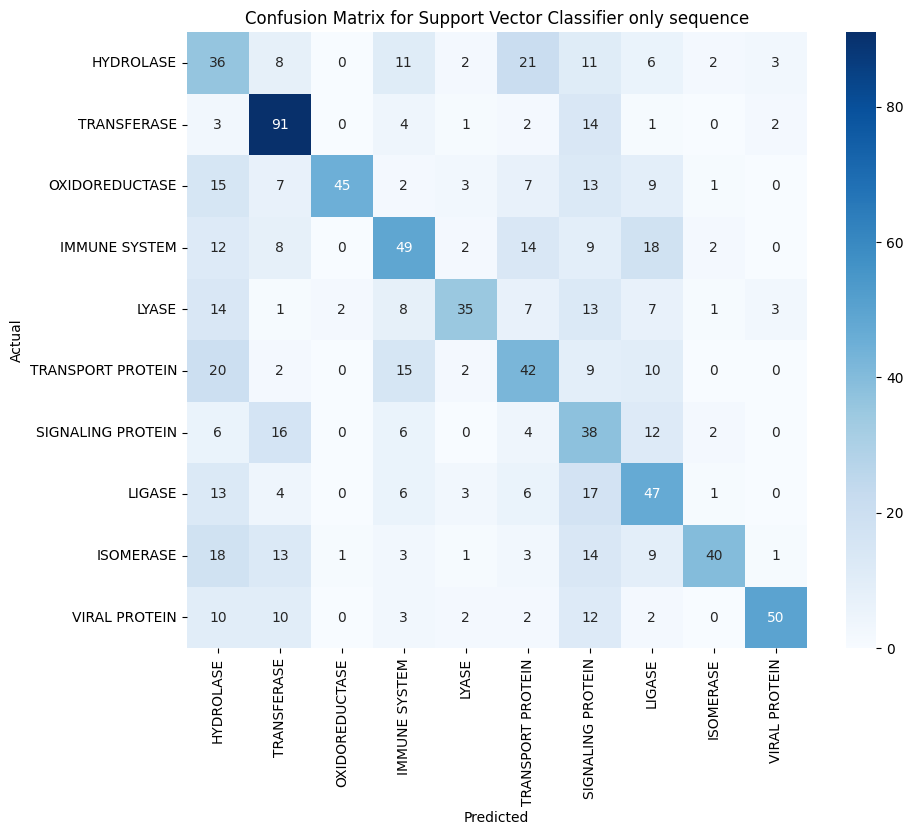

In [ ]:
# Plotting confusion matrix for the Bayes Model
plot_confusion_matrix(y_test, NB_pred, class_list, "Confusion Matrix for Bayes Model only sequence")

# Plotting confusion matrix for the SVM classifier
plot_confusion_matrix(y_test, svm_pred, class_list, "Confusion Matrix for Support Vector Classifier only sequence")